In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [201]:
pdf = pd.read_excel('./metrics-non-optimized-and-optimized-prompts.ods', sheet_name='csv')
pdf

,ds,Spr_LSCD,Spr_WiC,llm,opt
0,dwug en,0.7480,0.2130,Llama 3.1,0
1,dwug es,0.2790,0.0740,Llama 3.1,0
2,dwug en,0.8780,0.6160,Llama 3.3,0
3,dwug es,0.6870,0.4700,Llama 3.3,0
4,dwug en,0.7150,0.4080,Mixtral-8x7b,0
5,dwug es,0.4950,0.2720,Mixtral-8x7b,0
6,dwug en,0.7980,0.3900,Llama 3.1,1
7,dwug es,0.6170,0.3130,Llama 3.1,1
8,dwug en,0.9200,0.6690,Llama 3.3,1
9,dwug es,0.6820,0.5250,Llama 3.3,1


In [135]:
pdf = pdf.melt(id_vars='ds llm opt'.split(), var_name='Metric', value_name='Value')

In [136]:
ppdf = pdf.pivot_table(index='ds llm Metric'.split(),columns='opt').reset_index()
ppdf.columns = [f'{a}{b}' for a,b in ppdf.columns]
ppdf.head()

,ds,llm,Metric,Value0,Value1
0,dwug en,Llama 3.1,Spr_LSCD,0.748,0.7980
1,dwug en,Llama 3.1,Spr_WiC,0.213,0.3900
2,dwug en,Llama 3.3,Spr_LSCD,0.878,0.9200
3,dwug en,Llama 3.3,Spr_WiC,0.616,0.6690
4,dwug en,MCL,Spr_LSCD,NaN,0.8674


In [178]:
hue_order = ['XL-LEXEME']
hue_order.extend([llm for llm in ppdf.llm.unique() if 'mcl' in llm.lower()])
hue_order.extend([llm for llm in ppdf.llm.unique() if llm not in hue_order])

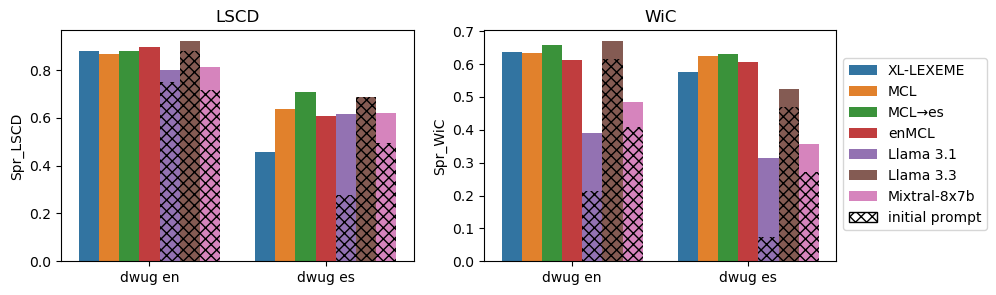

In [220]:
fig, axes = plt.subplots(1,2, figsize=(10,3))  # modify size as needed for the paper
for metric,ax in zip(ppdf.Metric.unique(), axes): 
    g = sns.barplot(data=ppdf[ppdf.Metric==metric], x='ds', y='Value1', hue='llm', hue_order=hue_order,
                    legend=True, ax=ax)
    legend_handles, legend_labels = g.legend_.legend_handles, [t.get_text() for t in g.legend_.texts] # Save legend for further extension
    g.legend_ = None

    g = sns.barplot(data=ppdf[ppdf.Metric==metric], x='ds', y='Value0', hue='llm', hue_order=hue_order,
                    hatch='xxx', legend=False, ax=ax)
    g.set(ylabel=metric, title=metric.split('_')[-1], xlabel='')
    
# *** Add hatched patch to the legend ***
from matplotlib.patches import Patch
legend_handles.append(Patch(facecolor='white', edgecolor='black', 
                      hatch='xxx', label='initial prompt'))
legend_labels.append('initial prompt')
fig.legend(handles=legend_handles, labels=legend_labels, loc='center left', bbox_to_anchor=(0.9, 0.5),
               frameon=True, fontsize='medium')
# *** Add hatched patch to the legend ***
